<a href="https://colab.research.google.com/github/Tefong35/TefongEugene/blob/main/PredictingNEXTNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#drive.mount("/gdrive", force_remount=True)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from datetime import datetime, date
import seaborn as sns
#import random
from random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
#import statsmodels.api as sm
#from scipy import stats
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.utils import to_categorical


Next Number Prediction

In [4]:
# Daten einlesen
data = pd.read_excel("/content/drive/MyDrive/Mappe_nagelneu.xlsx", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,55,37,28,8,64,49,54,43,66,24,31,56,6,4,25,50,29,27,41,40
1,19,60,57,37,43,52,50,15,66,35,10,27,61,51,65,70,8,31,11,69
2,67,26,21,35,43,70,47,40,54,16,19,61,63,45,58,25,34,52,68,36
3,6,28,37,61,62,12,40,26,46,3,29,65,2,70,49,54,38,69,64,14
4,6,7,61,28,52,21,59,5,41,27,53,63,47,55,26,29,35,18,4,57


In [3]:
print(data)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0     55  37  28   8  64  49  54  43  66  24  31  56   6   4  25  50  29  27   
1     19  60  57  37  43  52  50  15  66  35  10  27  61  51  65  70   8  31   
2     67  26  21  35  43  70  47  40  54  16  19  61  63  45  58  25  34  52   
3      6  28  37  61  62  12  40  26  46   3  29  65   2  70  49  54  38  69   
4      6   7  61  28  52  21  59   5  41  27  53  63  47  55  26  29  35  18   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
7194  42  43  62  15  37  60  49  20  47  21  55  39  36  64  22  25  17  29   
7195  19  67  62  12  30  15  14  26  33  31   9  27  47  10  21  57  48  65   
7196  16  18  34  27  20  11  62   7  25  40  22  39  31  15  53  29  70  55   
7197  67  56  24  43  70  47  55  17   1  16  12   3  28  42  54  62  66  27   
7198  63  27  49   7  12  55   8  29  61  44  22  30  37  70   6   5  45  14   

      18  19  
0     41  40  
1     11 

In [5]:
dataset = data.values
dataset

array([[55, 37, 28, ..., 27, 41, 40],
       [19, 60, 57, ..., 31, 11, 69],
       [67, 26, 21, ..., 52, 68, 36],
       ...,
       [16, 18, 34, ..., 55, 65, 44],
       [67, 56, 24, ..., 27, 44, 35],
       [63, 27, 49, ..., 14, 21, 46]])

In [6]:
# split labels and datas
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)):
        rowX = dataset[i, 0:-1].astype('float32')/max_num_X # Normalized X
        dataX.append(rowX)
        dataY.append(dataset[i, -1])
        X = np.array(dataX)
        y = np.array(dataY)
    return X, y

In [7]:
max_num_X = np.amax(dataset[:, 0:-1])
max_num_Y = np.amax(dataset[:, -1])
X, y = create_dataset(dataset)

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# reshape trainX and testX to be [samples, time steps, features]
samples_train = len(X_train)
samples_test = len(X_test)
time_steps = len(X_train[1])
trainX_input = np.reshape(X_train, (samples_train, time_steps, 1))
testX_input = np.reshape(X_test, (samples_test, time_steps, 1))

In [10]:
# one hot encode the output variable
output_size =  max_num_Y + 1
trainY_cat = to_categorical(y_train, num_classes = output_size) # output number range 0-max_num_Y+1
testY_cat = to_categorical(y_test, num_classes = output_size)

In [26]:
tf.keras.backend.clear_session()

In [24]:
# create the model
#input_dimension = 1
#model = Sequential()
#model.add(LSTM(128, input_shape=(time_steps, input_dimension))) # , recurrent_dropout=0.2, dropout=0.2 Use recurrent_dropout to apply dropout to the recurrent connections
#model.add(Dropout(0.2))
#model.add(Dense(output_size, activation='softmax'))# output_size=1, kernel_regularizer='l2' Use kernel_regularizer for L2 regularization
#model.add(Dense(output_size, activation='linear'))
#model.add(Dense(output_size, activation='relu'))
#model.add(Dense(1, activation='softmax'))

In [27]:
input_dimension = 1
model = Sequential()
model.add(LSTM(128, input_shape=(time_steps, input_dimension)))
model.add(Dropout(0.3))
model.add(Dense(output_size, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 71)                  │           9,159 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 71)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,791 (296.06 KB)

 Trainable params: 75,791 (296.06 KB)

 Non-trainable params: 0 (0.00 B)

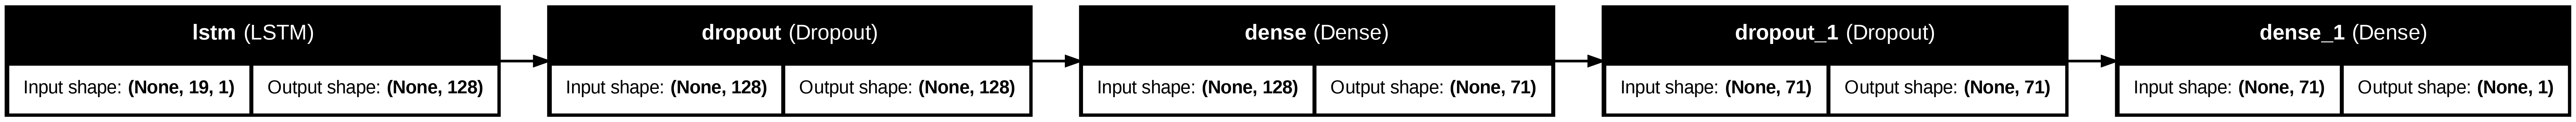

In [29]:
#plot model
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='LR', expand_nested=True, dpi=300,
)

In [30]:
#compile the model
#model.compile(loss='mean_squared_error', optimizer= "adam", metrics=['accuracy'])
#print('Toy LSTM model created...')

In [31]:
from keras.callbacks import EarlyStopping
# training
print('Training...')
early_stopping = EarlyStopping(monitor='val_loss', patience=5000) # , callbacks=[early_stopping]
history = model.fit(trainX_input, trainY_cat, epochs=10, batch_size = 128, verbose=1, validation_split=0.3, shuffle=False, callbacks=[early_stopping])

Training...
Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9257 - loss: 0.0796 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy: 0.9859 - val_loss: 0.0141
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9859 - loss: 0.0141 - val_accuracy

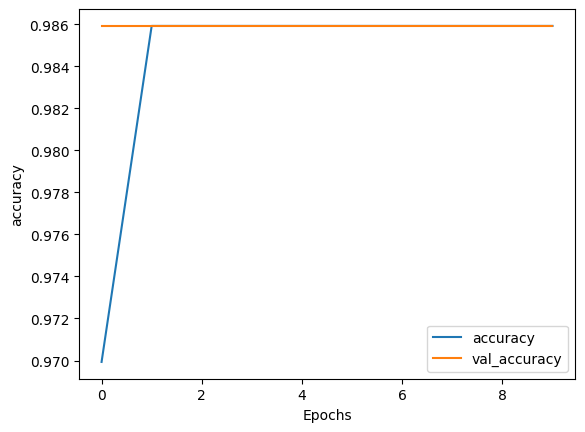

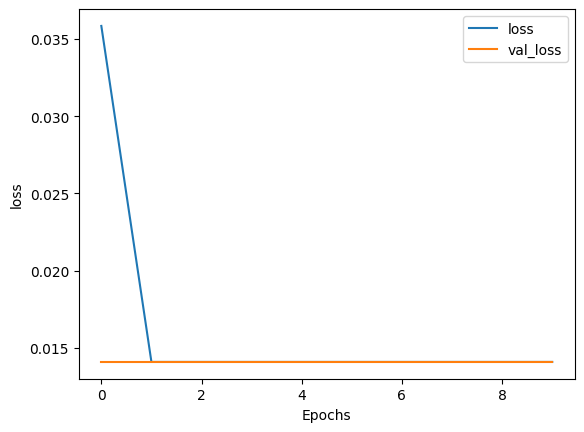

In [32]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss");

In [33]:
# testing
print('Testing on test data...')
scores = model.evaluate(testX_input, testY_cat, verbose=2)
print('Test accuracy on test data: {}'.format(scores[1]))

Testing on test data...
68/68 - 1s - 8ms/step - accuracy: 0.9859 - loss: 0.0141
Test accuracy on test data: 0.9859158992767334


In [34]:
print('Testing on training data...')
scores = model.evaluate(trainX_input, trainY_cat, verbose=2)
print('Test accuracy on training data: {}'.format(scores[1]))

Testing on training data...
158/158 - 1s - 8ms/step - accuracy: 0.9859 - loss: 0.0141
Test accuracy on training data: 0.985916018486023


In [35]:
# Prediction
#print('Predicting on testing data...')
#for row in X_test:
#    x = np.reshape(row, (1, len(row), 1))
#    prediction = model.predict(x, verbose=0)
#    y_hat = np.argmax(prediction)
    # Check if max_num_X is not None before using it
#    if max_num_X is not None:
#        print((row * max_num_X).astype("int"), "-->", y_hat)
#    else:
#        print("Warning: max_num_X is None. Cannot convert to integer.")
#        print(row, "-->", y_hat)

In [36]:
# Prediction
#print('Predicting on training data...')
#for row in X_train:
#    x = np.reshape(row, (1, len(row), 1))
#    prediction = model.predict(x, verbose=0)
#    y_hat = np.argmax(prediction)
    # Check if max_num_X is not None before using it
#    if max_num_X is not None:
#        print((row * max_num_X).astype("int"), "-->", y_hat)
#    else:
#        print("Warning: max_num_X is None. Cannot convert to integer.")
#        print(row, "-->", y_hat)